# Aprendizado de máquina não supervisionado

In [20]:
# Importando bibliotecas
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
# Importando dados
bruto = pd.read_csv('Neutral_Graphene_Oxide_Nanoflake_Dataset.zip')

# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')

# Excluir colunas de targets
del bruto_completo['file_name']
del bruto_completo['charge_state']
del bruto_completo['ionization_potential']
del bruto_completo['electron_affinity']
del bruto_completo['Shape']

dados = bruto_completo.copy()

del dados['total_energy']
del dados['Fermi_energy']

In [22]:
# indexando atributos
FEATURES = list(dados.keys())
print(FEATURES)

X = dados.reindex(FEATURES, axis=1)

['C', 'H', 'O', 'atom_number_total', 'C_concentration', 'H_concentration', 'O_concentration', 'avg_diameter', 'max_diameter', 'min_diameter', 'std_diameter', 'skew_diameter', 'kurt_diameter', 'anisotropy', 'area', 'AC_edge', 'ZZ_edge', 'total_edge', 'defects_count', 'defects_concentration', 'max_oop', 'mae_oop', 'std_oop', 'rmse_oop', 'residual_oop', 'ether_count', 'hydroxyl_count', 'carboxyl_count', 'edge_hydrogen_count', 'all_agent_group_count', 'ether_concentration', 'hydroxyl_concentration', 'carboxyl_concentration', 'def_local_ether_count', 'def_local_hydroxyl_count', 'def_local_carboxyl_count', 'def_local_other_count', 'max_bond_angle', 'max_bond_length', 'volume_per_atom', 'density_of_dangling_bonds', 'mass_density', 'particle_density', 'C-C:total_number', 'C-C:mean_value', 'C-C:error', 'C-C_sp2-sp3:total_number', 'C-C_sp2-sp3:mean_value', 'C-C_sp2-sp3:error', 'C-C_sp3-sp3:total_number', 'C-C_sp3-sp3:mean_value', 'C-C_sp3-sp3:error', 'C-C-C:total_number', 'C-C-C:mean_value', 'C-

In [23]:
# normalização
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

# Principal Component Analysis

In [24]:
# Fazendo a transformação de PCA
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [25]:
print(X_pca)

[[-7.68181848e+00 -5.06739684e+00 -8.18463509e+00 ... -8.43181095e-17
  -3.40074142e-17  5.74610542e-17]
 [-8.05634571e+00 -5.24818889e+00 -8.79533350e+00 ... -9.48139174e-17
  -1.40698490e-17  9.04043876e-16]
 [-5.91574562e+00 -5.09826264e+00 -8.97525933e+00 ... -1.51113831e-16
   1.01790151e-17  7.96274895e-16]
 ...
 [ 2.74982547e+01  1.50080007e+01  1.40448585e+01 ...  3.35087331e-16
  -7.33392427e-17  3.71748481e-15]
 [ 2.73062967e+01  1.44962525e+01  1.54138360e+01 ...  2.62878873e-16
  -1.19304099e-16  2.16450122e-15]
 [ 2.69706476e+01  1.45902706e+01  1.41768859e+01 ...  1.29545030e-16
  -6.74544815e-17  3.56355570e-15]]


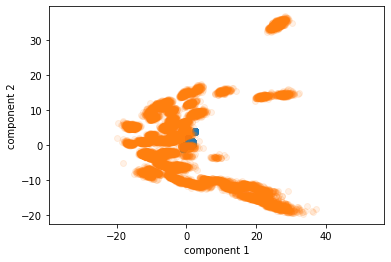

In [26]:
# plotando dois primeiros componentes
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

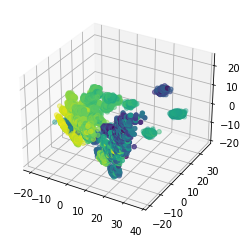

In [27]:
# plotando tres primeiros componentes
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=bruto_completo["Fermi_energy"].values)

In [28]:
# calculando a matriz de loadings
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names) #
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC640,PC641,PC642,PC643,PC644,PC645,PC646,PC647,PC648,PC649
C,-0.006772,0.085127,0.015486,0.024565,-0.002083,-0.001013,-0.002243,-0.018484,0.056690,0.026901,...,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
H,0.025345,0.083335,-0.027824,0.011479,-0.001176,0.003700,-0.000625,0.012678,-0.026709,-0.018539,...,5.330941e-04,2.730221e-05,4.078656e-04,-3.233675e-04,6.359167e-06,3.356682e-04,-5.834073e-05,-1.047472e-04,-3.313929e-05,-1.846106e-03
O,0.041393,0.077523,-0.009302,0.000682,0.000689,0.002081,0.000778,-0.000510,-0.012163,-0.008690,...,-4.401195e-14,-3.187578e-14,3.179921e-14,2.870256e-16,3.194364e-15,-2.170057e-14,-2.072812e-14,2.553024e-14,8.200385e-15,-1.932235e-13
atom_number_total,0.010851,0.088520,0.001987,0.017776,-0.001363,0.000597,-0.001335,-0.009221,0.027286,0.011090,...,8.134932e-14,5.456189e-14,-1.059345e-13,-2.558208e-14,6.313012e-15,-2.224580e-15,5.503488e-14,-4.890442e-14,1.562706e-14,1.763646e-13
C_concentration,-0.072351,0.000122,0.040148,0.009302,-0.001210,0.001067,-0.000094,-0.018326,0.077544,0.042938,...,1.648505e-12,8.323192e-13,-1.037673e-11,-4.925272e-14,-7.193754e-12,2.841781e-12,2.871805e-12,-2.036629e-12,2.821143e-12,-8.701543e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prox_norm_Iyy_bar_hydro_area,0.053969,-0.062664,-0.011138,0.019819,-0.002054,-0.000290,-0.001348,-0.018626,0.025604,0.006678,...,-3.292762e-03,5.359922e-04,2.858713e-03,-1.605761e-03,5.647122e-04,-2.656865e-04,3.608218e-04,-1.670374e-05,-2.236469e-07,-3.860533e-03
prox_norm_Izz_bar_hydro_area,0.054088,-0.062971,-0.010966,0.020033,-0.002083,-0.000211,-0.001384,-0.018490,0.024498,0.006219,...,-6.597406e-03,1.265855e-02,1.357663e-02,-2.069013e-02,1.378060e-02,1.229546e-03,9.508856e-04,-2.719760e-04,-3.314000e-04,2.362399e-04
prox_norm_Ixy_hydro_area,0.001719,0.001588,-0.001027,-0.006205,-0.035926,-0.220084,-0.103021,0.017022,0.001988,-0.000859,...,-2.384159e-04,-4.919249e-05,9.272543e-05,-7.561669e-05,9.572453e-06,-1.010561e-05,7.784269e-06,-7.705406e-07,-2.872214e-07,-3.914549e-03
prox_norm_Iyz_hydro_area,-0.000168,0.002363,-0.002569,-0.010146,-0.207952,0.063381,-0.068050,-0.026250,-0.008466,0.000332,...,-1.917164e-04,-2.495156e-05,5.837834e-05,-5.333168e-05,1.870943e-05,7.574593e-06,2.309911e-06,-9.477119e-07,1.760166e-07,6.308400e-03


array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

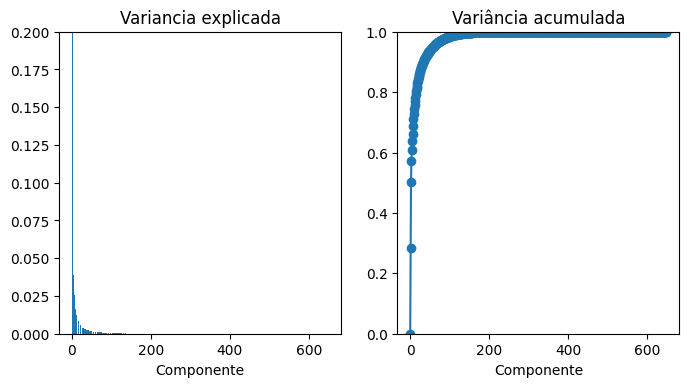

In [29]:
# plotando a variância para ver quantas componentes são importantes
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 0.2)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


## Vemos que com cerca de 100 componentes, quase toda a complexidade do sistema já é compreendida

In [30]:
# adicionando os targets ao dataset de PCA
E = []
i = 0
while i < len(bruto_completo['C']):
    E.append(bruto_completo['total_energy'][i]/bruto_completo['atom_number_total'][i])
    i = i+1
print(len(bruto_completo['total_energy']), len(E))
dados_pca = X_pca.assign(energy_per_atom = E)
dados_pca = dados_pca.assign(Fermi_energy = bruto_completo['Fermi_energy'])
print(dados_pca)

20396 20396
             PC1        PC2        PC3       PC4       PC5       PC6  \
0      -7.681818  -5.067397  -8.184635  2.151961  0.142412  0.470457   
1      -8.056346  -5.248189  -8.795334  1.790727 -0.767602 -3.349599   
2      -5.915746  -5.098263  -8.975259  2.453035 -0.195090  4.442486   
3      -7.826873  -5.402287  -8.118646  2.954057  0.174344  1.546050   
4      -8.338267  -5.236509  -7.384683  1.910704 -0.674772  0.440800   
...          ...        ...        ...       ...       ...       ...   
20391  26.453409  14.398719  14.727526  4.068422 -2.295120 -8.026951   
20392  26.216464  14.682567  14.397345  2.769930  6.865332  0.878376   
20393  27.498255  15.008001  14.044858  5.575967  5.607925  3.679714   
20394  27.306297  14.496253  15.413836  5.033438 -3.425159  6.179218   
20395  26.970648  14.590271  14.176886  5.366007 -1.479603 -2.778557   

             PC7        PC8       PC9      PC10  ...         PC642  \
0       0.274933  -0.249166 -1.726827 -0.735870  ... 

# Floresta Aleatória com PCA

## Separação teste/treino para Energia de Fermi:

In [31]:
# Define o tamanho dos dados de teste e de treino e cria os dataframes

from sklearn.model_selection import train_test_split

df_fermi = dados_pca.copy()

#escolhe o tamanho do nosso teste
TAMANHO_TESTE = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
SEMENTE_ALEATORIA = 24569
DATASET_NAME = "df_fermi"
# faz uma lista de features que queremos usar, no caso são todas
FEATURES = list(df_fermi.keys()[0:10])

#o que queremos achar
TARGET = ["Fermi_energy"]


indices = df_fermi.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_fe = df_fermi.loc[indices_treino]
df_teste_fe = df_fermi.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_fe = df_treino_fe.reindex(FEATURES, axis=1).values
y_treino_fe = df_treino_fe.reindex(TARGET, axis=1).values
x_teste_fe = df_teste_fe.reindex(FEATURES, axis=1).values
y_teste_fe = df_teste_fe.reindex(TARGET, axis=1).values

In [32]:
print(len(x_teste_fe))

2040


### Baseline

In [33]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error

In [34]:
# Criar um modelo regressor "dummy"
from sklearn.dummy import DummyRegressor

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(x_treino_fe, y_treino_fe)

# realiza uma previsão usando o modelo treinado
previsao_fe = modelo_baseline.predict(x_teste_fe)

print(previsao_fe)
# testando a qualidade do nosso modelo:
RMSE(previsao_fe, y_teste_fe)

[-4.95704166 -4.95704166 -4.95704166 ... -4.95704166 -4.95704166
 -4.95704166]


0.0909103434593051

## Separação teste/treino para Energia por Átomo:

In [35]:
# Criar os dados de teste e de treino
df_energia = dados_pca.copy()
#escolhe o tamanho do nosso teste
tamanho_teste = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
semente_aleatoria = 24569
# faz uma lista de features que queremos usar, no caso são todas
features = list(df_energia.keys()[0:10])

#o que queremos achar
target = ["energy_per_atom"]


indices = df_energia.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state= semente_aleatoria
)

df_treino_en = df_energia.loc[indices_treino]
df_teste_en = df_energia.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_en = df_treino_en.reindex(features, axis=1).values
y_treino_en = df_treino_en.reindex(target, axis=1).values
x_teste_en = df_teste_en.reindex(features, axis=1).values
y_teste_en = df_teste_en.reindex(target, axis=1).values

In [36]:

modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(x_treino_en, y_treino_en)

# realiza uma previsão usando o modelo treinado
previsao_en = modelo_baseline.predict(x_teste_en)

print(previsao_en)
# testando a qualidade do nosso modelo:
RMSE(y_teste_en, previsao_en)

[-47.41313446 -47.41313446 -47.41313446 ... -47.41313446 -47.41313446
 -47.41313446]


5.539576756227252

In [37]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor


def hiper_floresta(x_treino, y_treino, x_teste, y_teste, target_name):
    "Função que define modelo de floresta aleatória e testa qual hiperparâmetro será melhor"
    NUM_ARVORES = [100,200,300]
    NUM_FOLHAS = [None,100,20]
    NUM_PROFUNDIDADE = [None,5,10]
    RMSEl = {}

    #Variar o número dos hiperparâmetros
    for n_folhas, n_profundidade, n_arvores in product(
        NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
    ):
        modelo_rf = RandomForestRegressor(
            n_estimators=n_arvores,
            max_leaf_nodes=n_folhas,
            max_depth=n_profundidade,
            random_state=SEMENTE_ALEATORIA,
            n_jobs=4,
        )

        modelo_rf.fit(x_treino, y_treino.ravel()) 

        y_verdadeiro = (y_teste)
        y_previsao = modelo_rf.predict(x_teste)
        
        #testa RMSE para cada caso, que identificará o melhor hiperparâmetro
        RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) 
        RMSEl.update ({RMSE: [n_folhas, n_profundidade, n_arvores]})
    
    m = min(RMSEl.keys())

    print(
        f"O menor RMSE achado do modelo RF usando para target_name "
        f"n_estimators={RMSEl[m][2]} max_leaf_nodes={RMSEl[m][0]} "
        f"e max_depth={RMSEl[m][1]} foi de {m} eV."
    )
    return RMSEl[m][0], RMSEl[m][1], RMSEl[m][2]

In [38]:
n_folhas_fe, n_profundidade_fe, n_arvores_fe = hiper_floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe, "Energia de Fermi")

O menor RMSE achado do modelo RF usando para target_name n_estimators=300 max_leaf_nodes=None e max_depth=10 foi de 0.08442563050181899 eV.


In [39]:
n_folhas_en, n_profundidade_en, n_arvores_en = hiper_floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en, "Energia por atomo")

O menor RMSE achado do modelo RF usando para target_name n_estimators=200 max_leaf_nodes=None e max_depth=None foi de 0.14133424474532344 eV.


In [40]:
def floresta(x_treino, y_treino, x_teste, y_teste, target_name, n_folhas, n_profundidade, n_arvores):
    "Teste e treino do modelo"
    # alterando o formato do target
    #print(y_treino.shape, y_teste.shape)
    y_treino = y_treino.ravel()
    y_teste = y_teste.ravel()
    #print(y_treino.shape, y_teste.shape)

    # cria o modelo
    modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA,n_estimators=n_arvores, max_leaf_nodes=n_folhas,max_depth=n_profundidade)

    # treina o modelo
    modelo_rf.fit(x_treino, y_treino)

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_rf.predict(x_teste)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(x_teste)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    #Criar gráficos
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')

    if target_name ==  'Energia de Fermi':
        ax2.set_title('Floresta Aleatória PCA', fontsize = 16)
        F = FEATURES
        path = r'imagens\floresta_pca_fe.png'
    if target_name == 'Energia por Átomo':
        ax2.set_title('Floresta Aleatória PCA', fontsize = 16)
        F = features
        path = r'imagens\floresta_pca_en.png'
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    #plt.savefig(path, dpi = 200)
    
    importancia = modelo_rf.feature_importances_
    desvio_padrao = np.std(
        [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
    )

    serie_importancia = pd.Series(importancia, index=F)

    fig, axe = plt.subplots()
    serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe, color = 'g')
    axe.set_ylabel("Redução média da impureza")
    plt.show()

    print(f"O RMSE do modelo floresta aleatória para {target_name} foi de {RMSE} eV.")

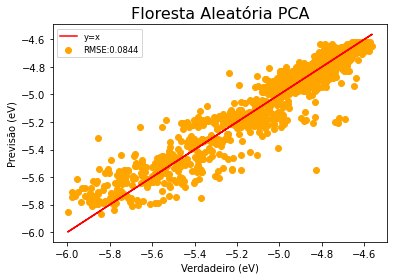

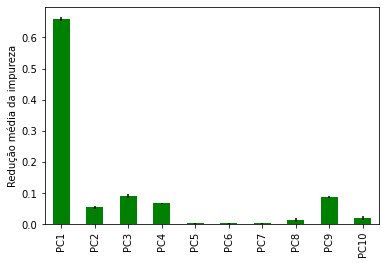

O RMSE do modelo floresta aleatória para Energia de Fermi foi de 0.08442563050181902 eV.


In [41]:
#Teste do modelo para energia de fermi;
floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe,'Energia de Fermi' ,n_folhas_fe, n_profundidade_fe, n_arvores_fe )

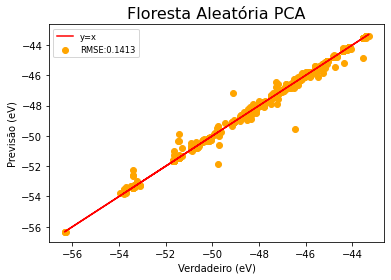

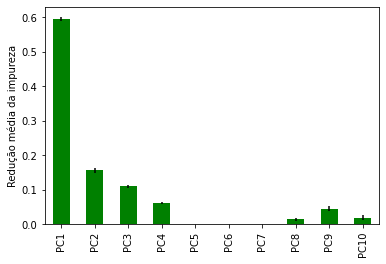

O RMSE do modelo floresta aleatória para Energia por Átomo foi de 0.14133424474532338 eV.


In [42]:
#Teste do modelo para energia por átomo:
floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en,'Energia por Átomo',n_folhas_en, n_profundidade_en, n_arvores_en)

## Clusterização

Para utilizarmos o clustering k-means, temos que definir o número de cluster. Para isso, utilizaremos a função WSS definida abaixo: 

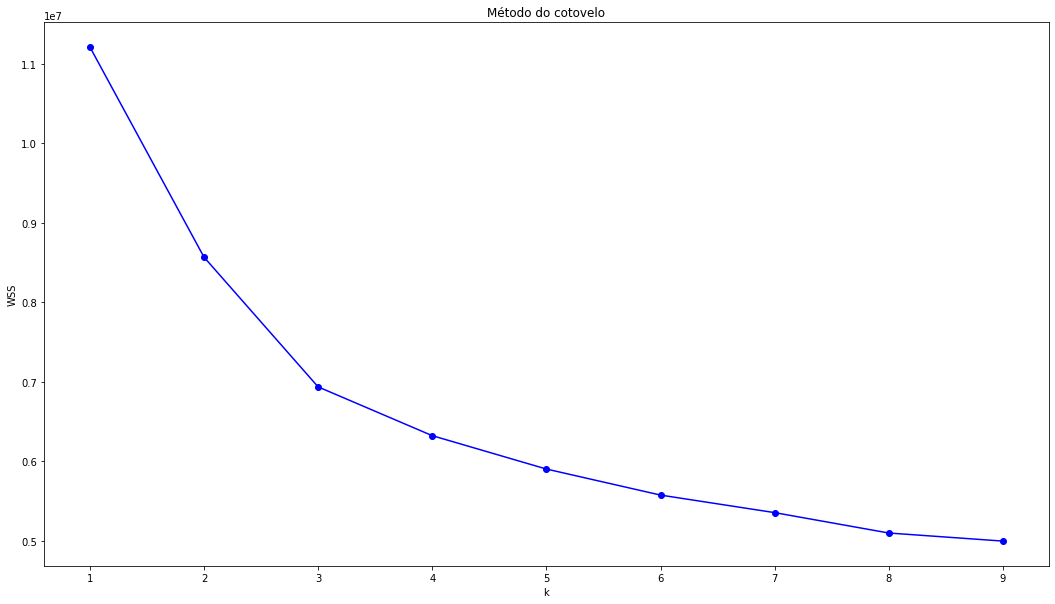

In [43]:
from sklearn.cluster import KMeans

WSS = []  #Inicia uma lista vazia, para acumularmos valores.

def cluster(dataset):
    for k in range(1,10): #Vamos fazer para 1 a 9 clusters.
        kmeans = KMeans(  #Chama o KMeans do Sklearn
            n_clusters=k, #Testa o número de clusters
            init='random', #VAMOS COLOCAR O K++?
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0
        )
        y_kmeans = kmeans.fit_predict(dataset) #Fita o K-Means #Qual dataset vai ser utilizado?
        WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 

    plt.figure(figsize=(18,10))              #Define o tamanho da figura
    plt.plot(range(1,10), WSS, '-bo')        #Define o plot
    plt.xlabel('k')                          #Nome da coordenada x
    plt.ylabel('WSS')                        #Nome da coordenada y
    plt.title('Método do cotovelo')          #Título do gráfico
    plt.show()                               #Mostra o gráfico
    return 

cluster(dados_pca)
#cluster(X_norm)

A partir desse gráfico, vemos que o cotovelo está localizado entre 3 e 5. Dessa forma, testaremos o Kmeans para todas esses valores de clusters:

             PC1        PC2        PC3
0      -7.681818  -5.067397  -8.184635
1      -8.056346  -5.248189  -8.795334
2      -5.915746  -5.098263  -8.975259
3      -7.826873  -5.402287  -8.118646
4      -8.338267  -5.236509  -7.384683
...          ...        ...        ...
20391  26.453409  14.398719  14.727526
20392  26.216464  14.682567  14.397345
20393  27.498255  15.008001  14.044858
20394  27.306297  14.496253  15.413836
20395  26.970648  14.590271  14.176886

[20396 rows x 3 columns]


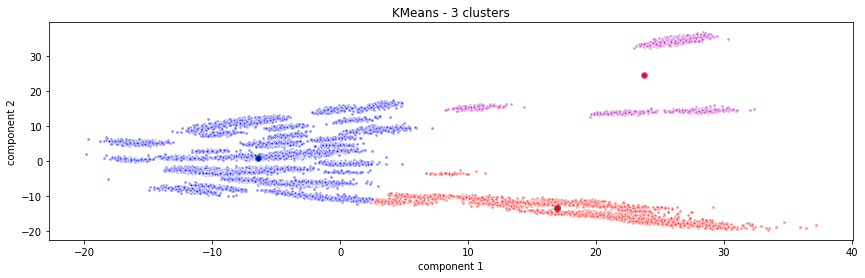

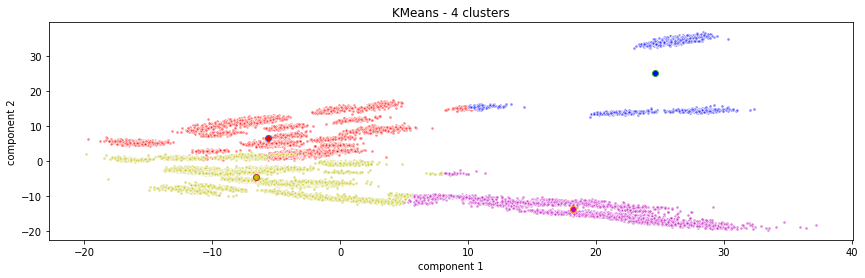

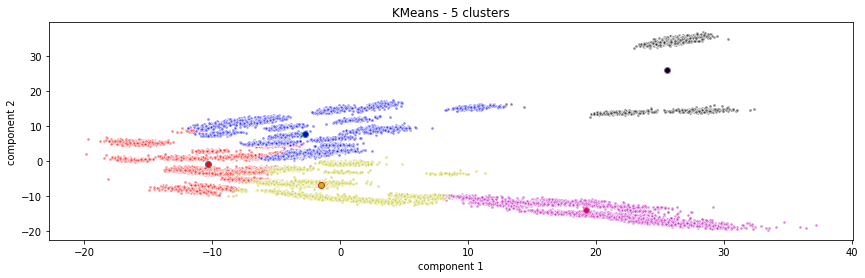

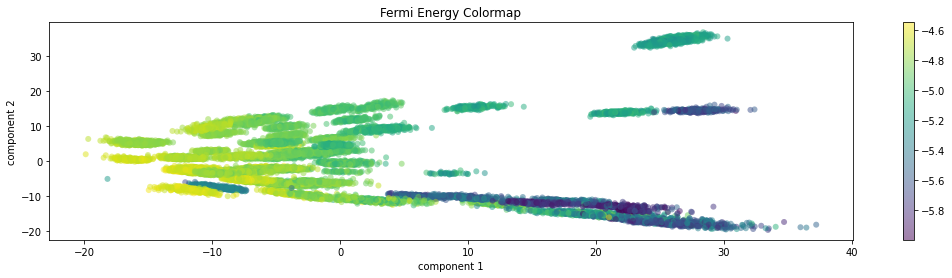

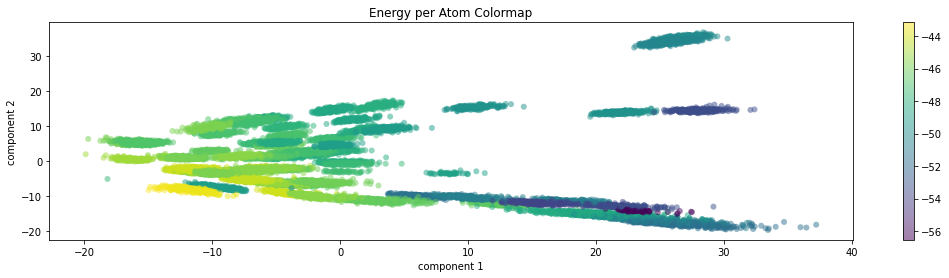

In [44]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

PCS = ["PC1", "PC2", "PC3"]

print(dados_pca[PCS])

for numberofclusters in range(3,6):

    n_clusters=numberofclusters

    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = kmeans.fit_predict(dados_pca[PCS])

    centroids = kmeans.cluster_centers_
    labels = pairwise_distances_argmin(dados_pca[PCS], centroids)
    colors = ["r", "m", "b", "y", "k"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            dados_pca.iloc[my_members, 0],
            dados_pca.iloc[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0
        )
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
plt.scatter(dados_pca.iloc[:, 0], dados_pca.iloc[:, 1], edgecolor='none', alpha=0.5, c=dados_pca["Fermi_energy"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_title('Fermi Energy Colormap')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
plt.scatter(dados_pca.iloc[:, 0], dados_pca.iloc[:, 1], edgecolor='none', alpha=0.5, c=dados_pca["energy_per_atom"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_title('Energy per Atom Colormap')

plt.colorbar()
plt.savefig(r'imagens\clusters.png', dpi = 200)
plt.show()

Text(0.5, 0, 'Component 3')

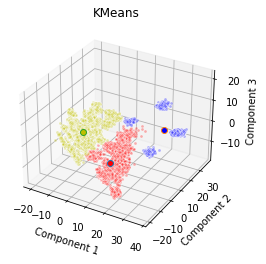

In [45]:
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(dados_pca[PCS])

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(dados_pca[PCS], centroids)
colors = ["r", "b", "y"]

fig = plt.figure() #figsize=(22, 10))
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        dados_pca.iloc[my_members, 0], 
        dados_pca.iloc[my_members, 1],
        dados_pca.iloc[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        #markeredgecolor="k",
        markersize=6,
    )

ax.set_title("KMeans")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')


### outro tipo de clusterização - Hierarquizaçao 

In [46]:
# vamos utilizar PC1 e PC2 como x e y, e dividir em 30 clusters

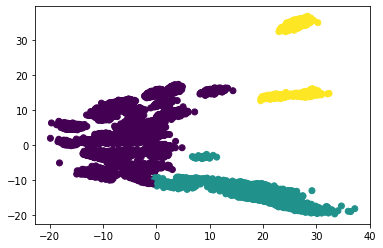

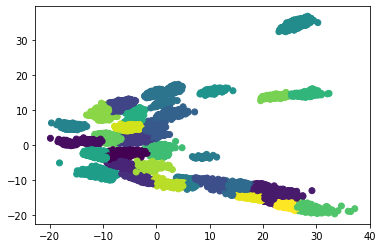

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = dados_pca ["PC1"]
y = dados_pca["PC2"]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

hierarchical_cluster2 = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster2.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

**Comparando o gráfico do K-means com a hierarquia, com 3 clusters, eles separaram em lugares próximos. A diferença é que na hierarquia ele em conta um grupo roxo que está mais distante do grupo maior. Porém quando colocamos mais clusters, vemos muitos grupos separados que podem ser possíveis agrupamentos.